In [1]:
library(dplyr)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.5.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ stringr 1.5.1
✔ tidyr   1.3.1     ✔ forcats 1.0.0
✔ readr   2.1.5     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
bioclim <- read.csv("gbif_bioclim.csv")
trait <- read.csv("try_reduced.csv")

In [30]:
str(trait)
str(bioclim)

'data.frame':	52323 obs. of  5 variables:
 $ X          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ SpeciesName: chr  "Castanea sativa" "Fagus sylvatica" "Larix decidua" "Picea sitchensis" ...
 $ TraitName  : chr  "Seed dry mass" "Seed dry mass" "Seed dry mass" "Seed dry mass" ...
 $ StdValue   : num  1433 158 6.24 2.94 6.19 ...
 $ UnitName   : chr  "mg" "mg" "mg" "mg" ...
'data.frame':	43799 obs. of  24 variables:
 $ scientificName: chr  "Quercus robur L." "Fagus sylvatica L." "Quercus palustris Münchh." "Quercus robur L." ...
 $ countryCode   : chr  "DE" "DE" "DE" "DE" ...
 $ species       : chr  "Quercus robur" "Fagus sylvatica" "Quercus palustris" "Quercus robur" ...
 $ x             : num  13.2 10.64 12.39 12.51 9.59 ...
 $ y             : num  52.5 52.1 51.4 50.7 51.5 ...
 $ BIO1          : num  283 282 283 282 282 ...
 $ BIO2          : num  11.6 11.6 11.8 12.5 11.3 ...
 $ BIO3          : num  23.4 24.1 23.7 31 29 ...
 $ BIO4          : num  697 653 689 683 636 ...
 $ BIO5          : num

In [31]:
dispersal_sum <- trait %>% 
        filter(TraitName == "Seed dry mass") %>% 
        group_by(SpeciesName) %>% 
        summarize(mean_sdm = mean(StdValue, na.rm = TRUE)) %>% 
        arrange(-mean_sdm)
                         

In [22]:
str(dispersal_sum)

tibble [41 × 2] (S3: tbl_df/tbl/data.frame)
 $ SpeciesName  : chr [1:41] "Castanea sativa" "Quercus cerris" "Quercus rubra" "Quercus robur" ...
 $ std_value_avg: num [1:41] 3783 3083 2752 2708 1931 ...


In [32]:
bioclim12_sum <- bioclim %>% group_by(species) %>% 
                           summarise(BIO12 = mean(BIO12, na.rm = TRUE), n = n())
str(bioclim12_sum)

tibble [112 × 3] (S3: tbl_df/tbl/data.frame)
 $ species: chr [1:112] "Abies alba" "Abies amabilis" "Abies balsamea" "Abies cephalonica" ...
 $ BIO12  : num [1:112] 1.201 0.894 0.941 1.022 0.83 ...
 $ n      : int [1:112] 1128 12 1 10 46 4 42 3 58 2 ...


In [33]:
trait_bio_join <- left_join(bioclim12_sum,dispersal_sum, by = c("species" = "SpeciesName"))
str(trait_bio_join)

tibble [112 × 4] (S3: tbl_df/tbl/data.frame)
 $ species : chr [1:112] "Abies alba" "Abies amabilis" "Abies balsamea" "Abies cephalonica" ...
 $ BIO12   : num [1:112] 1.201 0.894 0.941 1.022 0.83 ...
 $ n       : int [1:112] 1128 12 1 10 46 4 42 3 58 2 ...
 $ mean_sdm: num [1:112] 64.4 NA NA NA 35.5 ...


Warning message:
“Removed 73 rows containing missing values or values outside the scale range
(`geom_point()`).”


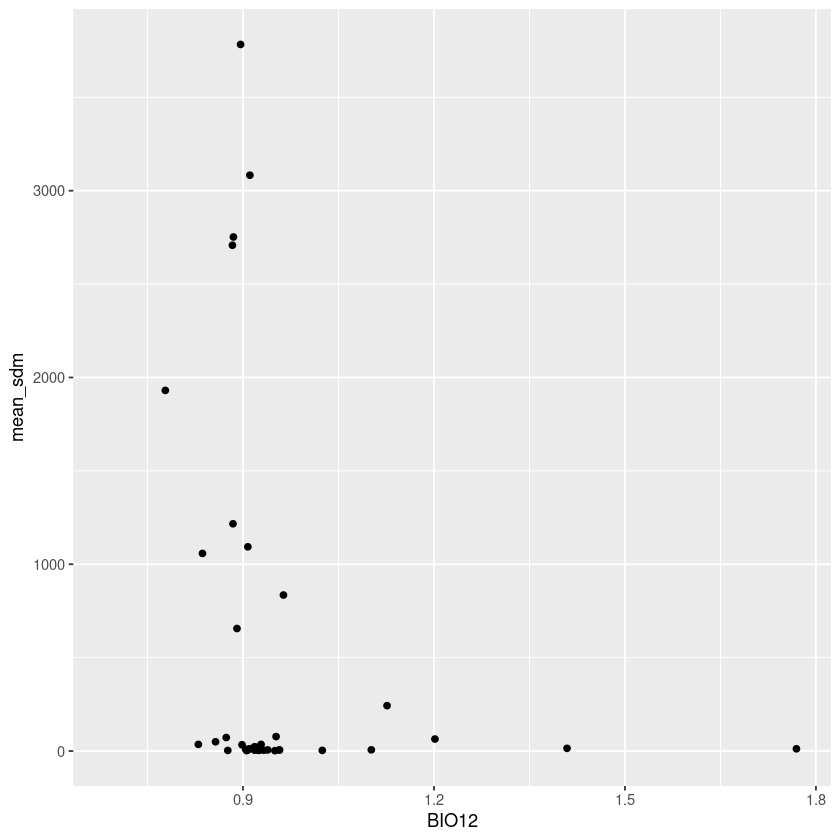

In [34]:
ggplot(trait_bio_join, aes(BIO12, mean_sdm )) + geom_point()